# Activity 1.1

First importing the libraries that I will need in this activity.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from matplotlib.collections import PatchCollection

##### 1.) and 2.) Creating the sinusoid along the x-axis and grating frequency.

Rescaling formula:
\begin{equation}
x_{\rm{scaled}} = \frac{x - \rm{min}(x)}{\rm{max}(x) - \rm{min}(x)}
\end{equation}

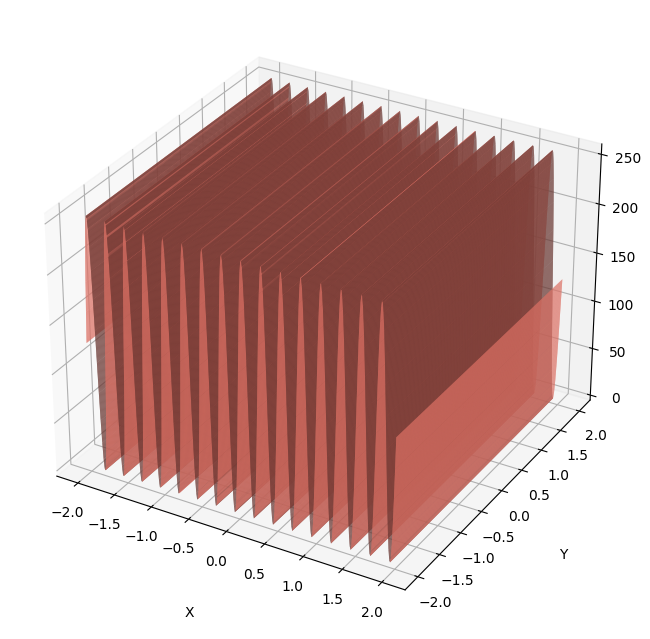

In [3]:
N = 400                    # number of data points
x = np.linspace(-2,2,N)       # range of x values
y = np.linspace(-2,2,N)       # range of y values
X,Y = np.meshgrid(x,y)      # making a mesh from the x and y values

f = 2*np.pi*4                 # cycles per cm
half_amp = 255/2              
R = np.sin(f*X)

R = 255*(R - min(map(min, R)))/(max(map(max,R)) - min(map(min, R)))


A = np.zeros(R.shape)
A[R>half_amp] = 1

fig = plt.figure(figsize = (8,10))
ax = plt.axes(projection='3d')

surface_color = ax.plot_surface(X, Y, R, color = "salmon", rstride=1, cstride=1, alpha=None)

ax.set_xlabel('X', labelpad=20)
ax.set_ylabel('Y', labelpad=20)
ax.set_zlabel('R', labelpad=20)
plt.show()


In [4]:
print(min(map(min, R)))

0.0


Top view of the sine wave using imshow: 


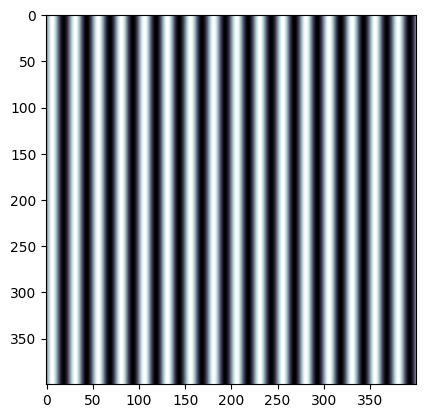

The grid thing: 


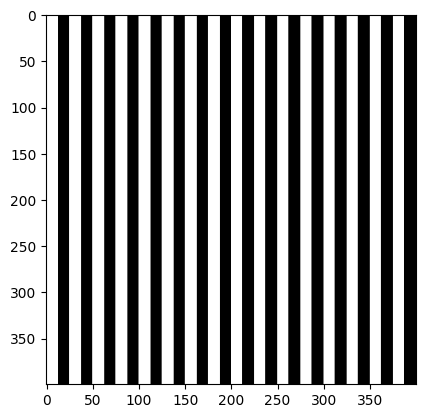

In [5]:
A = np.zeros(R.shape)
A[R>255/2] = 1

print("Top view of the sine wave using imshow: ")
fig, ax = plt.subplots()
ax.imshow(R, cmap = "bone")
plt.show()

print("The grid thing: ")
fig, ax = plt.subplots()
ax.imshow(A, cmap = "gray")
plt.show()

#### 3.) Hubble's Primary Mirror

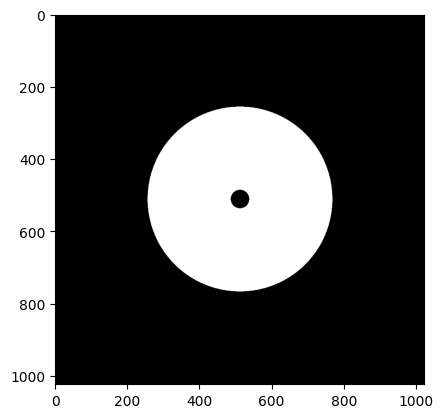

<Figure size 640x480 with 0 Axes>

In [6]:
N = 1024 #the higher num is the finer
x = np.linspace(-1,1,num = N)
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R))

outer_radius = 0.5
inner_radius = outer_radius/10

A[R < outer_radius] = 1.0
A[R < inner_radius] = 0

#display as an image

plt.imshow(A, cmap = "gray")
#display as a 3D surface in Cartesian coordinates
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,A)
plt.show()

#### 4.) Hexagon arrray

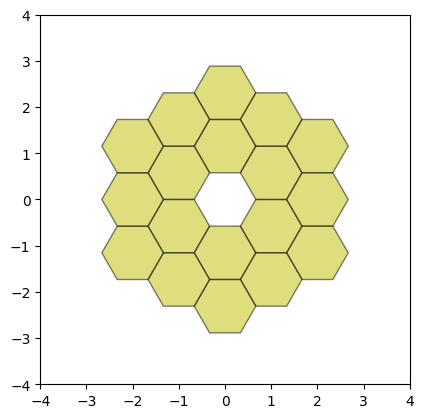

In [7]:
# source: https://www.geeksforgeeks.org/matplotlib-patches-regularpolygon-class-in-python/
# coords: (x,y,orientation)
coord = [[0, 1, -1],
         [-1, 1, 0],
         [-1, 0, 1],
         [0, -1, 1],
         [1, -1, 0],
         [1, 0, -1],
         [0,3,-1],
         [1,3,0],
         [2,1,-1],
         [2,0,0],
         [2,-1, 1],
         [1,-2,1],
         [0,-4,0],
         [-1, -2, 1],
         [-2, -1, 1],
         [-2, 0, 0],
         [-2, 1, -1],
         [-1, 2, -1]]
 
colors = ["y" for c in coord]
 
 
# Horizontal cartesian coords
hcoord = [c[0] for c in coord]
 
# Vertical cartesian coords
vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3.
          for c in coord]


 
fig, ax = plt.subplots(1)
ax.set_aspect('equal')
 
# Add some coloured hexagons
for x, y, c in zip(hcoord, vcoord, colors):
     
    # matplotlib understands lower
    # case words for colours
    color = c[0].lower()
    hex = RegularPolygon((x, y),
                         numVertices = 6,
                         radius = 2. / 3.,
                         orientation = np.radians(30),
                         facecolor = color,
                         alpha = 0.5,
                         edgecolor ='k')
     
    ax.add_patch(hex)
    
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
plt.show()

# 1.2

Creating olympic logo

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


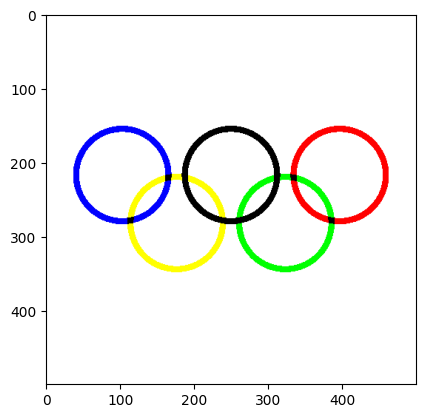

In [72]:
N = 500
x = np.linspace(-15,15, N)
y = x
X,Y = np.meshgrid(x,y)
Blue, Yellow, Black, Green, Red= np.zeros((N,N)), np.zeros((N,N)), np.zeros((N,N)), np.zeros((N,N)), np.zeros((N,N)),

#draw colored circles
Rt, Rc, deg = 3, 4, 30
xt, yt = Rt*np.cos(deg*np.pi/180), Rt*np.sin(deg*np.pi/180)
I = np.ones((N,N,3))
I[...,0] = 1
I[...,1] = 1
I[...,2] = 1


R = np.sqrt((X+3.4*xt)**2 + (Y+1.3*yt)**2)
Blue[R<Rc]= 1
Blue[R < (Rc -0.5)] = 0

R = np.sqrt((X+1.7*xt)**2 + (Y-1.3*yt)**2)
Yellow[R<Rc] = 1
Yellow[R < (Rc -0.5)] = 0

R = np.sqrt((X)**2 + (Y+1.3*yt)**2)
Black[R<Rc] = 1
Black[R < (Rc -0.5)] = 0

R = np.sqrt((X-1.7*xt)**2 + (Y-1.3*yt)**2)
Green[R<Rc] = 1
Green[R < (Rc -0.5)] = 0

R = np.sqrt((X-3.4*xt)**2 + (Y+1.3*yt)**2)
Red[R<Rc] = 1
Red[R < (Rc -0.5)] = 0

I[...,0] = 1 - Blue - Black  - Green                  #Red
I[...,1] = 1 - Blue - Black  - Red                 #Green
I[...,2] = 1 - Yellow - Black  - Green  - Red              #Blue



fig = plt.figure()
plt.imshow(I)

plt.show()

In [16]:
print(I)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
